# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [64]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [65]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_api_key = "2a5bce97ba1cad3fa0f7a54c158d5d99"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_response["coord"]["lat"]
        city_lng = city_weather_response["coord"]["lon"]
        city_max_temp = city_weather_response["main"]["temp_max"]
        city_humidity = city_weather_response["main"]["humidity"]
        city_clouds = city_weather_response["clouds"]["all"]
        city_wind = city_weather_response["wind"]["speed"]
        city_country = city_weather_response["sys"]["country"]
        city_date = city_weather_response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hirara
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | landskrona
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | scottburgh
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | floro
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | brookings
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | red bank
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | barah
Processing Record 21 of Set 1 | mirandela
Processing Record 22 of Set 1 | olonkinbyen
Processing

Processing Record 41 of Set 4 | avarua
Processing Record 42 of Set 4 | akureyri
Processing Record 43 of Set 4 | sassandra
Processing Record 44 of Set 4 | kolonia town
Processing Record 45 of Set 4 | greenfield
Processing Record 46 of Set 4 | ambon
Processing Record 47 of Set 4 | enewetak
Processing Record 48 of Set 4 | lazaro cardenas
Processing Record 49 of Set 4 | fortuna
Processing Record 0 of Set 5 | cartagena
Processing Record 1 of Set 5 | troitsko-pechorsk
Processing Record 2 of Set 5 | prince rupert
Processing Record 3 of Set 5 | queenstown
Processing Record 4 of Set 5 | ojinaga
Processing Record 5 of Set 5 | kuala terengganu
Processing Record 6 of Set 5 | hami
Processing Record 7 of Set 5 | taoudenni
Processing Record 8 of Set 5 | hammerfest
Processing Record 9 of Set 5 | selfoss
Processing Record 10 of Set 5 | santana
Processing Record 11 of Set 5 | mekhe
Processing Record 12 of Set 5 | pingdingshan
Processing Record 13 of Set 5 | porto novo
Processing Record 14 of Set 5 | lew

Processing Record 34 of Set 8 | cabedelo
Processing Record 35 of Set 8 | piton saint-leu
Processing Record 36 of Set 8 | necochea
Processing Record 37 of Set 8 | tynda
Processing Record 38 of Set 8 | raichur
Processing Record 39 of Set 8 | nemuro
Processing Record 40 of Set 8 | karema
Processing Record 41 of Set 8 | tabou
Processing Record 42 of Set 8 | kimbe
Processing Record 43 of Set 8 | ad dabbah
Processing Record 44 of Set 8 | tsiombe
Processing Record 45 of Set 8 | kas
Processing Record 46 of Set 8 | isla mujeres
Processing Record 47 of Set 8 | fale old settlement
Processing Record 48 of Set 8 | cascais
Processing Record 49 of Set 8 | saacow
Processing Record 0 of Set 9 | puerto armuelles
Processing Record 1 of Set 9 | santa cruz
Processing Record 2 of Set 9 | panjab
Processing Record 3 of Set 9 | asau village
City not found. Skipping...
Processing Record 4 of Set 9 | orsa
Processing Record 5 of Set 9 | praia da vitoria
Processing Record 6 of Set 9 | cockburn town
Processing Reco

Processing Record 18 of Set 12 | qamdo
Processing Record 19 of Set 12 | douentza
Processing Record 20 of Set 12 | kosong
Processing Record 21 of Set 12 | sungai raya
-----------------------------
Data Retrieval Complete      
-----------------------------


In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [68]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        hirara  24.8000  125.2833     80.87        65          40   
1        bethel  41.3712  -73.4140     36.64        69           0   
2         utrik  11.2278  169.8474     80.83        79          72   
3  puerto ayora  -0.7393  -90.3518     75.09        91          79   
4     grytviken -54.2811  -36.5092     37.72        68           2   

   Wind Speed Country        Date  
0        8.05      JP  1702617922  
1        5.75      US  1702617922  
2       19.60      MH  1702617922  
3        7.02      EC  1702617922  
4        3.87      GS  1702617923

In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("../WeatherPy_VacationPy/cities.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy_VacationPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                    
0              hirara  24.8000  125.2833     80.87        65          40   
1              bethel  41.3712  -73.4140     36.64        69           0   
2               utrik  11.2278  169.8474     80.83        79          72   
3        puerto ayora  -0.7393  -90.3518     75.09        91          79   
4           grytviken -54.2811  -36.5092     37.72        68           2   

         Wind Speed Country        Date  
City_ID                                  
0              8.05      JP  1702617922  
1              5.75      US  1702617922  
2             19.60      MH  1702617922  
3              7.02      EC  1702617922  
4              3.87      GS  1702617923

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

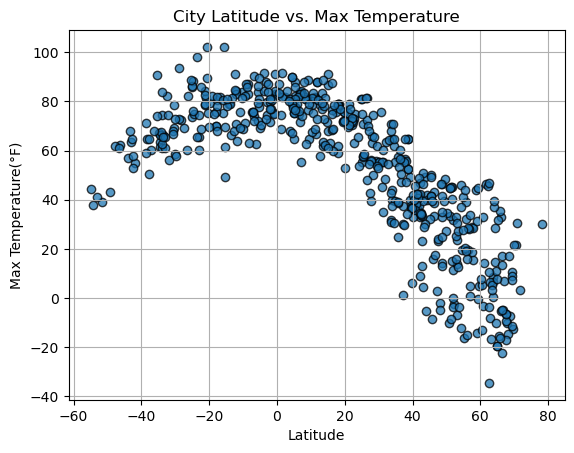

In [77]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(Â°F)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy_VacationPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

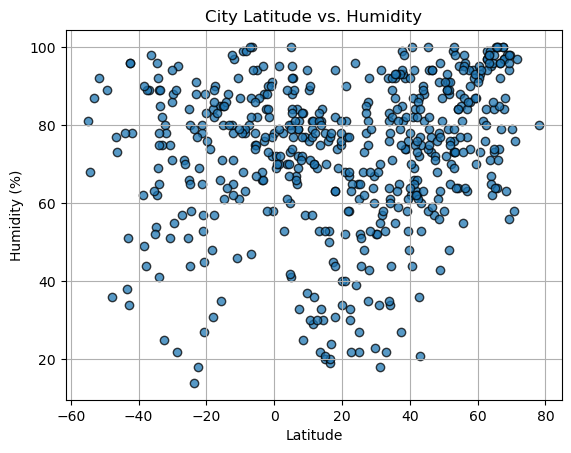

In [78]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy_VacationPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

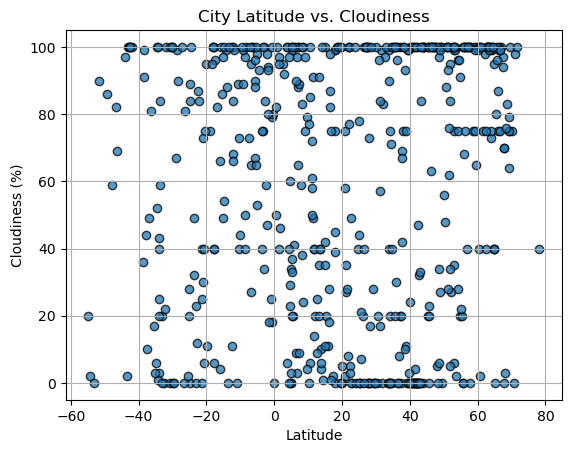

In [73]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy_VacationPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

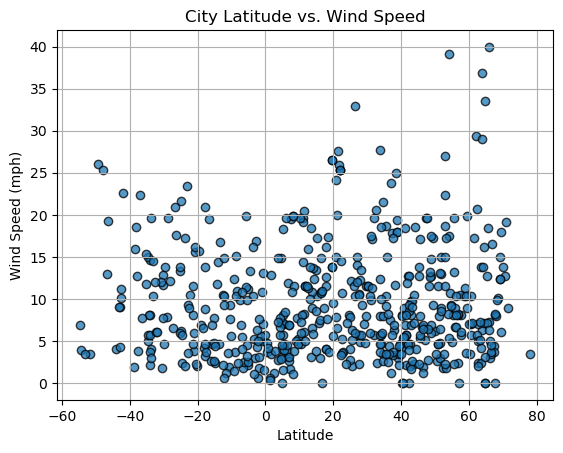

In [79]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy_VacationPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [107]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept

In [104]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
0            hirara  24.8000  125.2833     80.87        65          40   
1            bethel  41.3712  -73.4140     36.64        69           0   
2             utrik  11.2278  169.8474     80.83        79          72   
5        landskrona  55.8708   12.8302     39.15        98          68   
6           klyuchi  52.2667   79.1667     -2.65        70          27   

         Wind Speed Country        Date  
City_ID                                  
0              8.05      JP  1702617922  
1              5.75      US  1702617922  
2             19.60      MH  1702617922  
5              6.67      SE  1702617923  
6              1.83      RU  1702617923

In [105]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

City      Lat      Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
3          puerto ayora  -0.7393 -90.3518     75.09        91          79   
4             grytviken -54.2811 -36.5092     37.72        68           2   
7            scottburgh -30.2867  30.7532     69.13        71         100   
8               ushuaia -54.8000 -68.3000     44.26        81          20   
10       puerto natales -51.7236 -72.4875     39.25        92          90   

         Wind Speed Country        Date  
City_ID                                  
3              7.02      EC  1702617922  
4              3.87      GS  1702617923  
7             11.70      ZA  1702617923  
8              6.91      AR  1702617923  
10             3.44      CL  1702617923

###  Temperature vs. Latitude Linear Regression Plot

In [106]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

print(regress_values)

NameError: name 'regress_values' is not defined

The r-value is: 0.4121057168607245


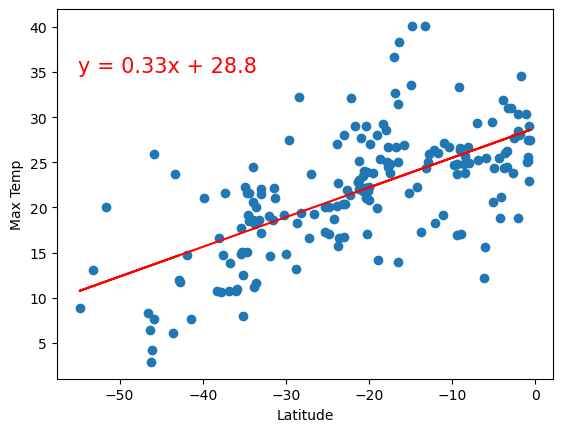

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


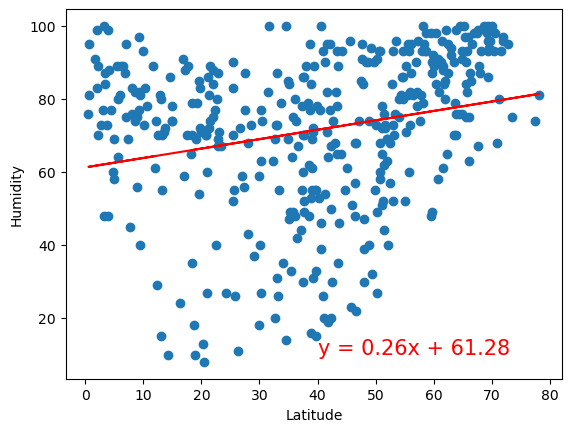

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


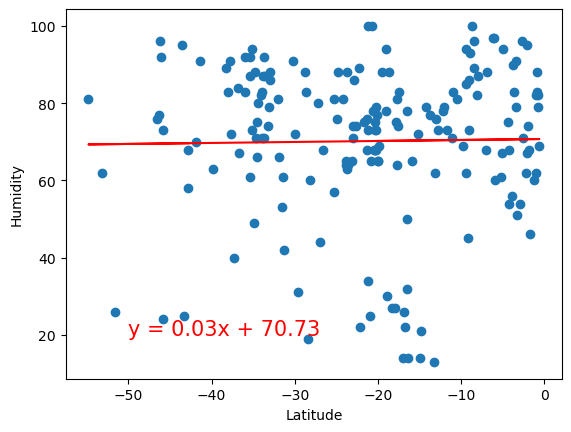

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


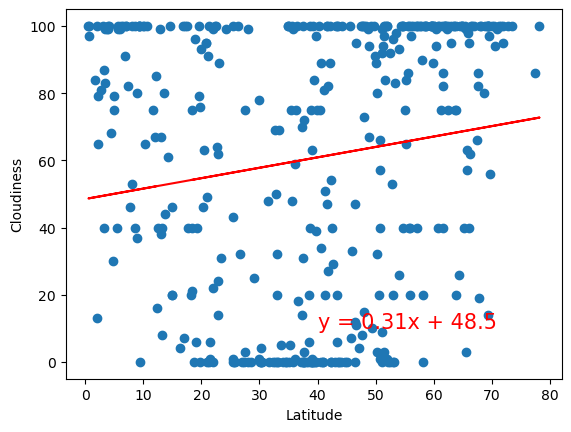

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


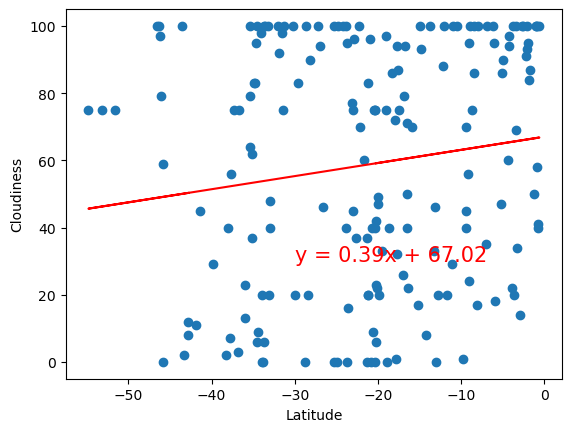

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


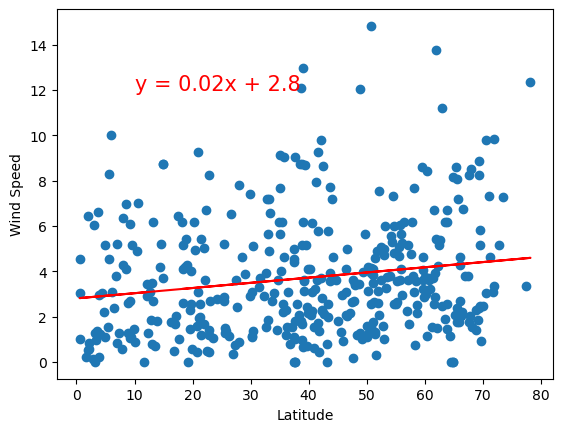

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


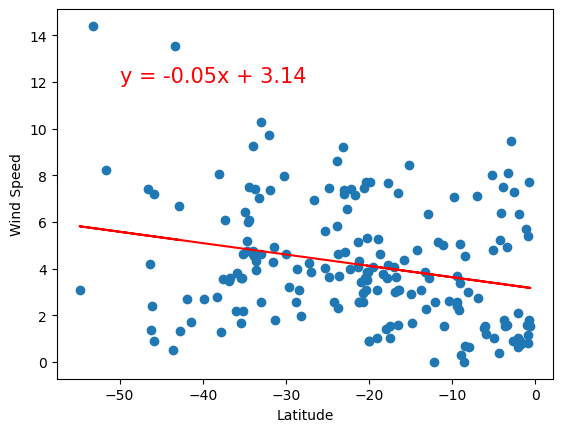

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE